In [14]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# load a data
file_path = '250123 플라즈마 반응 시간별 평가.xlsx'
sheet_name = 'Sheet2'
data = pd.read_excel(file_path, sheet_name=sheet_name)
data = data.sort_values(by='residence time', ascending=True).reset_index(drop=True)
data

,CH4,power,H2,C2H6,C2H4,C2H2,C3H8,C3H6,C4+,C5+,Power density,residence time
0,7.374037,36.3650,60.844870,21.100576,3.069246,2.161299,7.831114,0.673577,1.226689,2.092630,4.300000,5.654867
1,7.793436,36.2875,53.131999,24.774169,3.238512,2.381046,9.549377,0.774826,1.586790,2.563281,4.278026,7.270543
2,8.730190,36.2620,62.076446,19.506959,1.590174,1.381178,8.638037,0.563257,1.843308,2.400639,4.275020,10.178760
3,21.527452,36.6260,43.313949,31.174455,3.419099,2.674283,12.708874,0.938875,2.314383,3.456081,4.317933,16.964600


In [16]:
# Reactor configuration
crossA = 0.565 #cm2
length = 15 #cm
volume = crossA * length
flow_rate = [30, 50, 70 , 90]

In [17]:
# Initial state
kb = 1.380649e-23 #m2-kg/s2/K
P = 101325 #Pa
T = 400 #K
ni_CH4 = np.array([P/kb/T for i in range(4)])/1e6

In [20]:
# State declaration
data_tr1 = pd.DataFrame({
    "flow rate[mL/min]": flow_rate,
    "residence time[s]": volume / (np.array(flow_rate) / 60),
    "ni_CH4[1/mL]": ni_CH4
})
data_tr1 = data_tr1.sort_values(by="residence time[s]", ascending=True).reset_index(drop=True)
data_tr1['n_CH4[1/mL]'] = data_tr1['ni_CH4[1/mL]']*(1-data['CH4']/100)
data_tr1['dC[1/mL]'] = data_tr1['ni_CH4[1/mL]'] - data_tr1['n_CH4[1/mL]']
data_tr1['dH[1/mL]'] = 4*(data_tr1['ni_CH4[1/mL]'] - data_tr1['n_CH4[1/mL]'])
data_tr1['n_H2[1/mL]'] = data['H2']/0.5/100*data_tr1['dC[1/mL]']
data_tr1['n_C2H6[1/mL]'] = data['C2H6']/2/100*data_tr1['dC[1/mL]']
data_tr1['n_C2H4[1/mL]'] = data['C2H4']/2/100*data_tr1['dC[1/mL]']
data_tr1['n_C2H2[1/mL]'] = data['C2H2']/2/100*data_tr1['dC[1/mL]']
data_tr1['n_C3H8[1/mL]'] = data['C3H8']/3/100*data_tr1['dC[1/mL]']
data_tr1['n_C3H6[1/mL]'] = data['C3H6']/3/100*data_tr1['dC[1/mL]']
data_tr1['n_C4+[1/mL]'] = data['C4+']/4/100*data_tr1['dC[1/mL]']
data_tr1['n_C5+[1/mL]'] = data['C5+']/5/100*data_tr1['dC[1/mL]']
data_tr1['cal_dC[1/mL]'] = data_tr1['n_C2H6[1/mL]']*2 + data_tr1['n_C2H4[1/mL]']*2 + data_tr1['n_C2H2[1/mL]']*2 + data_tr1['n_C3H8[1/mL]']*3 + data_tr1['n_C3H6[1/mL]']*3 + data_tr1['n_C4+[1/mL]']*4 + data_tr1['n_C5+[1/mL]']*5
data_tr1['cal_dH[1/mL]'] = data_tr1['n_H2[1/mL]']*2 + data_tr1['n_C2H6[1/mL]']*6 + data_tr1['n_C2H4[1/mL]']*4 + data_tr1['n_C2H2[1/mL]']*2 + data_tr1['n_C3H8[1/mL]']*8 + data_tr1['n_C3H6[1/mL]']*6 + data_tr1['n_C4+[1/mL]']*10 + data_tr1['n_C5+[1/mL]']*12
data_tr1['sum_N'] = data_tr1[[col for col in data_tr1.columns if col.startswith('n')]].sum(axis=1) - data_tr1['ni_CH4[1/mL]']

data_mol = pd.DataFrame({
    'flow rate[mL/min]': flow_rate
})
data_mol['flow rate[mL/min]'] = data_tr1['flow rate[mL/min]']
data_mol['mol%CH4'] = data_tr1['n_CH4[1/mL]']/data_tr1['sum_N'] * 100
data_mol['mol%H2'] = data_tr1['n_H2[1/mL]']/data_tr1['sum_N'] * 100
data_mol['mol%C2H6'] = data_tr1['n_C2H6[1/mL]'] / data_tr1['sum_N'] * 100
data_mol['mol%C2H4'] = data_tr1['n_C2H4[1/mL]'] / data_tr1['sum_N'] * 100
data_mol['mol%C2H2'] = data_tr1['n_C2H2[1/mL]'] / data_tr1['sum_N'] * 100
data_mol['mol%C3H8'] = data_tr1['n_C3H8[1/mL]'] / data_tr1['sum_N'] * 100
data_mol['mol%C3H6'] = data_tr1['n_C3H6[1/mL]'] / data_tr1['sum_N'] * 100
data_mol['mol%C4+'] = data_tr1['n_C4+[1/mL]'] / data_tr1['sum_N'] * 100
data_mol['mol%C5+'] = data_tr1['n_C5+[1/mL]'] / data_tr1['sum_N'] * 100

data_mol

,flow rate[mL/min],mol%CH4,mol%H2,mol%C2H6,mol%C2H4,mol%C2H2,mol%C3H8,mol%C3H6,mol%C4+,mol%C5+
0,90,90.074367,8.726253,0.756551,0.110046,0.077492,0.187187,0.016101,0.021991,0.030012
1,70,90.388302,8.118308,0.946343,0.123707,0.090953,0.243183,0.019732,0.030307,0.039166
2,50,88.234794,10.478359,0.823182,0.067104,0.058285,0.243013,0.015846,0.038893,0.040522
3,30,76.644252,18.214290,3.277354,0.359448,0.281146,0.890718,0.065802,0.121655,0.145334


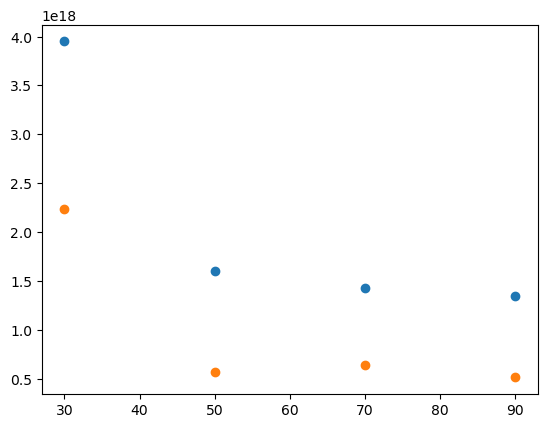

In [ ]:
# plot the data
plt.scatter(data_tr1['flow rate[mL/min]'],data_tr1['dC[1/mL]'])
plt.scatter(data_tr1['flow rate[mL/min]'],data_tr1['cal_dC[1/mL]'])

In [ ]:
data

,CH4,power,H2,C2H6,C2H4,C2H2,C3H8,C3H6,C4+,C5+,Power density,residence time
0,7.374037,36.3650,60.844870,21.100576,3.069246,2.161299,7.831114,0.673577,1.226689,2.092630,4.300000,5.654867
1,7.793436,36.2875,53.131999,24.774169,3.238512,2.381046,9.549377,0.774826,1.586790,2.563281,4.278026,7.270543
2,8.730190,36.2620,62.076446,19.506959,1.590174,1.381178,8.638037,0.563257,1.843308,2.400639,4.275020,10.178760
3,21.527452,36.6260,43.313949,31.174455,3.419099,2.674283,12.708874,0.938875,2.314383,3.456081,4.317933,16.964600
